# K-fold cross-validation

Using scikit-learn

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

from new.functions import runge, OLS_parameters, MSE, Ridge_parameters, Lasso_gradient, R2

# from sklearn.linear_model import Ridge


In [2]:
# no of datapoints
n = 1000

# random seed
np.random.seed(42)

# setting x and y
x = np.linspace(-1,1, n).reshape(-1,1)
np.random.shuffle(x)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

maxdegree = 10
degrees = range(1,maxdegree+1)

# initialising kfolds
k = 10
kfold = KFold(n_splits= k)

scores_kfold = np.zeros((maxdegree,k))


# looping over polynomial degrees
for p in degrees:

    poly = PolynomialFeatures(degree=p)
    scaler = StandardScaler()
    j = 0 
    for train_inds, test_inds in kfold.split(x):
        x_train = x[train_inds]
        y_train = y[train_inds]

        x_test = x[test_inds]
        y_test = y[test_inds]

        X_train = poly.fit_transform(x_train)
        # OLS
        beta = OLS_parameters(X_train, y_train)
        y_train_tilde = X_train @ beta + y_train.mean()

        X_test = poly.fit_transform(x_test)
        y_pred = X_test @ beta + y_train.mean()
        scores_kfold[p-1,j] = MSE(y_test, y_pred)
        j += 1

estimated_mse_kfold = np.mean(scores_kfold, axis = 1)



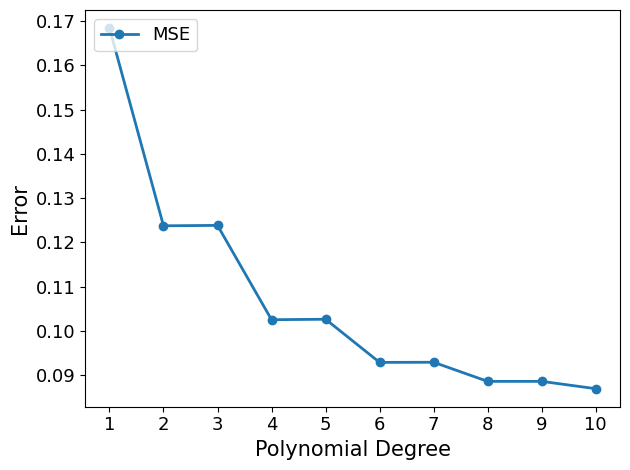

In [3]:
# plotting
plt.plot(degrees,estimated_mse_kfold, label='MSE', marker='o', linewidth=2)

plt.xlabel('Polynomial Degree', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.xticks(degrees)
plt.tick_params(axis='both', labelsize=13)
plt.legend(fontsize=13, loc='upper left')
plt.tight_layout(h_pad=3.0)  # Increase vertical space between plots
# plt.savefig("../Figures/kfold_k5_pmax10.png", dpi=300, bbox_inches='tight')
plt.show()

Heatmap of mse for kfolds with polynomial degree and folds. 

In [4]:
# 

mses = np.zeros((5,5))

ks = range(2,7)
maxdegree = 10
degrees = range(6,maxdegree+1)

# no of datapoints
n = 1000

# random seed
np.random.seed(42)

# setting x and y
x = np.linspace(-1,1, n).reshape(-1,1)
np.random.shuffle(x)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)


for i in ks:
    kfold = KFold(n_splits= i)

    scores_kfold = np.zeros((5,i))
    for p in degrees:
            poly = PolynomialFeatures(degree=p)
            scaler = StandardScaler()
            j = 0 
            for train_inds, test_inds in kfold.split(x):
                x_train = x[train_inds]
                y_train = y[train_inds]

                x_test = x[test_inds]
                y_test = y[test_inds]

                X_train = poly.fit_transform(x_train)

                # OLS
                beta = OLS_parameters(X_train, y_train)
                y_train_tilde = X_train @ beta + y_train.mean()

                X_test = poly.fit_transform(x_test)
                y_pred = X_test @ beta + y_train.mean()

                scores_kfold[p-6,j] = MSE(y_test, y_pred)
                j += 1
    mses[i-2,:] = np.mean(scores_kfold, axis = 1)




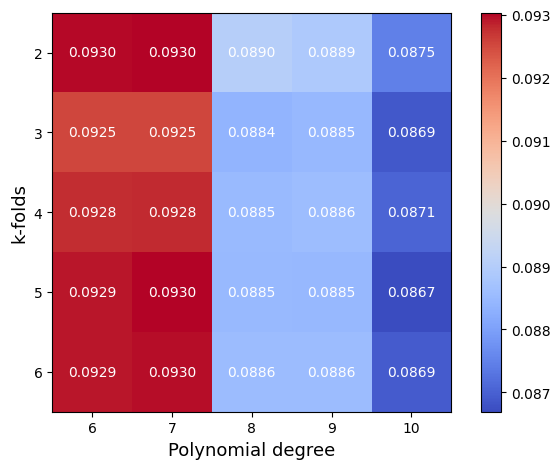

In [5]:
fig, ax = plt.subplots()
im = ax.imshow(mses, cmap='coolwarm')
ax.set_xticks(range(len(degrees)), labels=degrees)
ax.set_yticks(range(len(ks)), labels=ks)

for i in ks:
    for j in degrees:
        text = ax.text(j-6, i-2, "{:.4f}".format(mses[i-2,j-6]), ha='center', va='center', color='w')

# ax.set_title('MSE of cross validation')
ax.set_xlabel('Polynomial degree', fontsize=13)
ax.set_ylabel('k-folds', fontsize=13)

fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.savefig("../Figures/kfold_hetamap.png", dpi=300, bbox_inches='tight')
plt.show()


In [6]:
# no of datapoints
n = 1000

# random seed
np.random.seed(42)

# setting x and y
x = np.linspace(-1,1, n).reshape(-1,1)
np.random.shuffle(x)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

maxdegree = 20
degrees = range(1,maxdegree+1)

# initialising kfolds
k = 5
kfold = KFold(n_splits= k)

scores_kfold_ridge = np.zeros((maxdegree,k))


# looping over polynomial degrees
for p in degrees:

    poly = PolynomialFeatures(degree=p)
    scaler = StandardScaler()
    j = 0 
    for train_inds, test_inds in kfold.split(x):
        x_train = x[train_inds]
        y_train = y[train_inds]

        x_test = x[test_inds]
        y_test = y[test_inds]

        X_train = poly.fit_transform(x_train)
        # Ridge
        beta = Ridge_parameters(X_train, y_train, 0.0001)
        y_train_tilde = X_train @ beta + y_train.mean()

        X_test = poly.fit_transform(x_test)
        y_pred = X_test @ beta + y_train.mean()
        scores_kfold_ridge[p-1,j] = MSE(y_test, y_pred)
        j += 1

estimated_mse_kfold_ridge = np.mean(scores_kfold_ridge, axis = 1)

ValueError: x and y must have same first dimension, but have shapes (20,) and (10,)

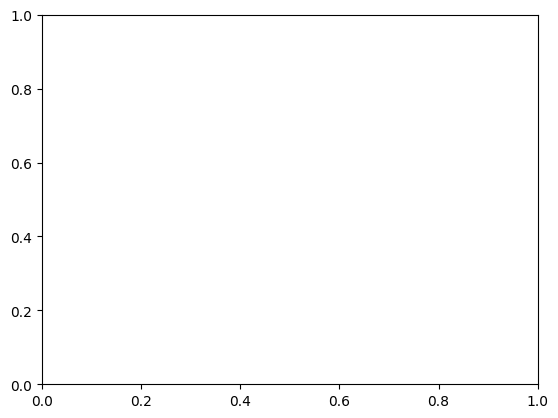

In [7]:
# plotting
plt.plot(degrees,estimated_mse_kfold, label='OLS', marker='o', linewidth=2)
plt.plot(degrees,estimated_mse_kfold_ridge, label='Ridge', marker='o', linewidth=2)

plt.xlabel('Polynomial Degree', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.xticks(degrees)
plt.tick_params(axis='both', labelsize=13)
plt.legend(fontsize=13, loc='upper left')
plt.tight_layout(h_pad=3.0)  # Increase vertical space between plots
plt.savefig("../Figures/kfold_k5_ridge.png", dpi=300, bbox_inches='tight')
plt.show()

Lasso 

In [ ]:
# no of datapoints
n = 1000

# random seed
np.random.seed(42)

# setting x and y
x = np.linspace(-1,1, n).reshape(-1,1)
np.random.shuffle(x)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

p = 10

# initialising kfolds
k = 5
kfold = KFold(n_splits= k)

scores_kfold_lasso = np.zeros(k)

lmbda = 0.0001
rho = 0.9


poly = PolynomialFeatures(degree=p)
scaler = StandardScaler()




j = 0 
for train_inds, test_inds in kfold.split(x):
    x_train = x[train_inds]
    y_train = y[train_inds]

    x_test = x[test_inds]
    y_test = y[test_inds]

    X_train = poly.fit_transform(x_train)
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test = poly.fit_transform(x_test)
    X_test_s = scaler.transform(X_test)
    # OLS
    beta_r = Ridge_parameters(X_train_s, y_train, lmbda)
    beta_o = OLS_parameters(X_train_s, y_train)

    # Hessian matrix
    H = (2.0/len(X_train_s))* X_train_s.T @ X_train_s 
    EigValues, EigVectors = np.linalg.eig(H)

    #Lasso with GD

    # Initialize weights for gradient descent
    beta_gd_lasso = np.zeros(len(beta_r))

    # Initialize hyperparameters
    lr = 1.0 / np.max(EigValues)
    num_iters = 100000
    stopping_criteria = [1e-10]*len(beta_r)

    for t in range(num_iters):
        # Compute gradients for Lasso
        grad_Lasso = Lasso_gradient(X_train_s, y_train, beta_gd_lasso, lmbda)
        # Update parameters beta
        beta_gd_lasso = beta_gd_lasso - lr * grad_Lasso
        # Check for convergence
        if (np.abs(- lr * grad_Lasso) < stopping_criteria).all():
            print("Convergence reached at iteration for Lasso", t)
            break

    y_gd_lasso = X_test_s @ beta_gd_lasso + y_train.mean()
    scores_kfold_lasso[j] = MSE(y_test, y_gd_lasso)
    j += 1
    
estimated_mse_kfold = np.mean(scores_kfold_lasso)
print(estimated_mse_kfold)

0.014728732690914917


: 

: 

In [ ]:
from sklearn.linear_model import LassoCV

# Using LassoCV for automatic lambda tuning and efficient regression
lasso = LassoCV(cv=5, random_state=42, max_iter=100000).fit(X_train_s, y_train)
y_pred = lasso.predict(X_test_s)
mse = MSE(y_test, y_pred)

print(f"MSE CV Lasso: {mse}")


/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1705: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE CV Lasso: 0.18097922810499778


: 

: 

: 

: 